In [1]:
import keras
import numpy as np
import time

C:\Users\mmastrel\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.applications import vgg16, vgg19, inception_v3, resnet50, mobilenet

vgg16_model = vgg16.VGG16(weights='imagenet')

vgg19_model = vgg19.VGG19(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

PIL image size (224, 224)


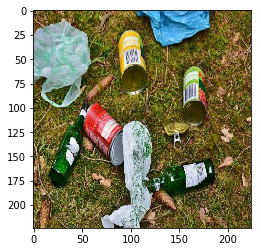

In [4]:
file_name = 'images/litter.jpg'
# Image in PIL format
original_image = load_img(file_name, target_size=(224, 224))
print('PIL image size',original_image.size)
plt.imshow(original_image)
plt.show()

# convert PIL image into a numpy array, image will be 224,224,3
numpy_image = img_to_array(original_image)

# Convert image into batch format
# expand_dims will add an extra dimension to the data at a particular axis.
# Input matrix to the network will be of the form (batchsize, height, width, channels: 1, 224,244,3)
# Thus we add the extra dimension to the axis 0.
batched_image = np.expand_dims(numpy_image, axis=0)


In [5]:
# process image for the VGG 16 model

tic = time.clock()
processed_image = vgg16.preprocess_input(batched_image.copy())

# Predicted probabilities for each class
predictions = vgg16_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions (default)
label_vgg = decode_predictions(predictions)

toc = time.clock()
print("Processing time:",(toc - tic))

label_vgg

Processing time: 1.7582486418399386


[[('n04557648', 'water_bottle', 0.32706466),
  ('n02823428', 'beer_bottle', 0.19215207),
  ('n04591713', 'wine_bottle', 0.15904616),
  ('n03937543', 'pill_bottle', 0.103454426),
  ('n03983396', 'pop_bottle', 0.08597294)]]

In [6]:
# process image for the VGG 19 model
tic = time.clock()
processed_image = vgg19.preprocess_input(batched_image.copy())

# Predicted probabilities for each class
predictions = vgg19_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions (default)
label_vgg19 = decode_predictions(predictions)

toc = time.clock()
print("Processing time:",(toc - tic))

label_vgg19

Processing time: 1.965880240262555


[[('n04557648', 'water_bottle', 0.60031664),
  ('n02823428', 'beer_bottle', 0.08212789),
  ('n02909870', 'bucket', 0.05710379),
  ('n03937543', 'pill_bottle', 0.041876793),
  ('n03983396', 'pop_bottle', 0.036756072)]]

In [7]:
# Process image for the Inception model
tic = time.clock()
processed_image = inception_v3.preprocess_input(batched_image.copy())

# Predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
# Getting top 5 predictions
label_inception = decode_predictions(predictions)

toc = time.clock()
print("Processing time:",(toc - tic))

label_inception

Processing time: 2.1987497526842255


[[('n02909870', 'bucket', 0.79831797),
  ('n03937543', 'pill_bottle', 0.20061013),
  ('n04423845', 'thimble', 0.00088457426),
  ('n03843555', 'oil_filter', 4.8908565e-05),
  ('n02795169', 'barrel', 3.786833e-05)]]

In [8]:
# Process image for the ResNet50 model
tic = time.clock()
processed_image = resnet50.preprocess_input(batched_image.copy())

# Predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# Getting top 5 predictions
label_resnet = decode_predictions(predictions, top=5)
toc = time.clock()
print("Processing time:",(toc - tic))

label_resnet

Processing time: 2.22300973102616


[[('n03937543', 'pill_bottle', 0.8644687),
  ('n02823428', 'beer_bottle', 0.098593645),
  ('n04557648', 'water_bottle', 0.009285811),
  ('n02909870', 'bucket', 0.0056529166),
  ('n04591713', 'wine_bottle', 0.0038656783)]]

In [9]:
# Process image for the MobileNet model
tic = time.clock()
processed_image = mobilenet.preprocess_input(batched_image.copy())

# Predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)


toc = time.clock()
print("Processing time:",(toc - tic))

label_mobilenet

Processing time: 1.5187993970781264


[[('n02823428', 'beer_bottle', 0.75969625),
  ('n03937543', 'pill_bottle', 0.13807364),
  ('n04591713', 'wine_bottle', 0.050670307),
  ('n04557648', 'water_bottle', 0.01790445),
  ('n03134739', 'croquet_ball', 0.0065744407)]]

PIL image size (224, 224)


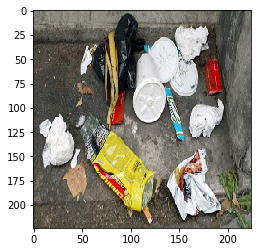

In [10]:
file_name2 = 'images/litter2.jpg'
# Image in PIL format
original_image2 = load_img(file_name2, target_size=(224, 224))
print('PIL image size',original_image2.size)
plt.imshow(original_image2)
plt.show()

# convert PIL image into a numpy array, image will be 224,224,3
numpy_image2 = img_to_array(original_image2)

# Convert image into batch format
# expand_dims will add an extra dimension to the data at a particular axis.
# Input matrix to the network will be of the form (batchsize, height, width, channels: 1, 224,244,3)
# Thus we add the extra dimension to the axis 0.
batched_image2 = np.expand_dims(numpy_image2, axis=0)

In [11]:
# process image for the VGG 16 model

tic = time.clock()

processed_image = vgg16.preprocess_input(batched_image2.copy())

# Predicted probabilities for each class
predictions = vgg16_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions (default)
label_vgg = decode_predictions(predictions)
toc = time.clock()

print("Processing time:",(toc - tic))

label_vgg



Processing time: 0.9358179695488218


[[('n03958227', 'plastic_bag', 0.50085676),
  ('n02747177', 'ashcan', 0.15951377),
  ('n04399382', 'teddy', 0.05030446),
  ('n04507155', 'umbrella', 0.029351639),
  ('n03026506', 'Christmas_stocking', 0.02575538)]]

In [12]:
# process image for the VGG 19 model
tic = time.clock()

processed_image = vgg19.preprocess_input(batched_image2.copy())

# Predicted probabilities for each class
predictions = vgg19_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions (default)
label_vgg19 = decode_predictions(predictions)

toc = time.clock()

print("Processing time:",(toc - tic))
label_vgg19

Processing time: 1.1412784752963674


[[('n03958227', 'plastic_bag', 0.7196227),
  ('n02747177', 'ashcan', 0.16710751),
  ('n04399382', 'teddy', 0.03617184),
  ('n04507155', 'umbrella', 0.008307219),
  ('n02892767', 'brassiere', 0.007326118)]]

In [14]:
# Process image for the Inception model

tic = time.clock()
processed_image = inception_v3.preprocess_input(batched_image2.copy())

# Predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
# Getting top 5 predictions
label_inception = decode_predictions(predictions)

toc = time.clock()

print("Processing time:",(toc - tic))
      
label_inception

Processing time: 0.6273740426425292


[[('n04557648', 'water_bottle', 0.3734197),
  ('n03825788', 'nipple', 0.2523616),
  ('n03958227', 'plastic_bag', 0.12436212),
  ('n02747177', 'ashcan', 0.12394144),
  ('n03188531', 'diaper', 0.050566796)]]

In [15]:
tic = time.clock()

# Process image for the ResNet50 model
processed_image = resnet50.preprocess_input(batched_image2.copy())

# Predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# Getting top 5 predictions
label_resnet = decode_predictions(predictions, top=5)


toc = time.clock()
print("Processing time:",(toc - tic))

label_resnet

Processing time: 1.0844007557667936


[[('n03958227', 'plastic_bag', 0.42023048),
  ('n04367480', 'swab', 0.15426543),
  ('n02747177', 'ashcan', 0.038212333),
  ('n02892767', 'brassiere', 0.037772458),
  ('n04550184', 'wardrobe', 0.034407258)]]

In [16]:
# Process image for the MobileNet model

tic = time.clock()
processed_image = mobilenet.preprocess_input(batched_image2.copy())

# Predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)

toc = time.clock()

print("Processing time:",(toc - tic))
label_mobilenet

Processing time: 0.5765621672564549


[[('n02747177', 'ashcan', 0.6974845),
  ('n03481172', 'hammer', 0.03395566),
  ('n03794056', 'mousetrap', 0.026284281),
  ('n02966687', "carpenter's_kit", 0.02485901),
  ('n03958227', 'plastic_bag', 0.02480421)]]